In [1]:
import pandas as pd
from scipy.stats import pearsonr

# Loading the data of the aggregate mentions and deaths
df = pd.read_csv('aggregate_mentions_and_death.csv')

'''Calculate the Pearson correlation coefficient to get the linear correlations between 
total covid mentions and deaths per percondition'''

correlation, p_value = pearsonr(df['total_mentions'], df['total_covid_deaths'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Correlation coefficient: 0.9780857373633914
P-value: 8.563260598326702e-16


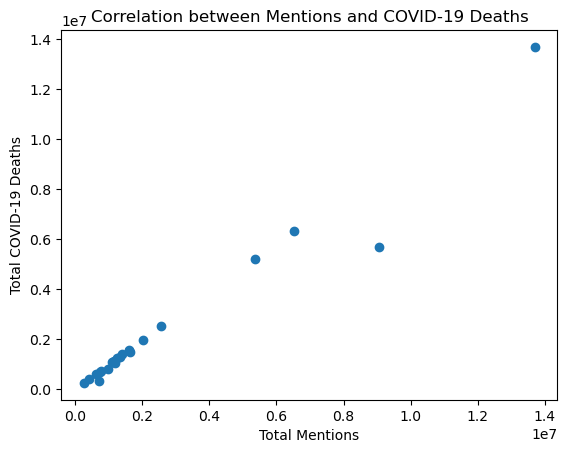

In [2]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the correlation
plt.scatter(df['total_mentions'], df['total_covid_deaths'])
plt.xlabel('Total Mentions')
plt.ylabel('Total COVID-19 Deaths')
plt.title('Correlation between Mentions and COVID-19 Deaths')
plt.show()

In [5]:
#importind Library for statistical model
import statsmodels.api as sm

# Prepare the data
X = df['total_mentions']
y = df['total_covid_deaths']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Creating an OLS model and fitinf it to the data to find the best fitting line through the data points.
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_covid_deaths   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     463.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           8.56e-16
Time:                        21:51:24   Log-Likelihood:                -339.08
No. Observations:                  23   AIC:                             682.2
Df Residuals:                      21   BIC:                             684.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.934e+04   1.69e+05      0.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is the DataFrame with the independent variables
X = df[['total_mentions']]
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#printing the DataFrame containing the VIF values for eachvariable
print(vif)

        variables       VIF
0           const  1.610077
1  total_mentions  1.000000


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df[['total_mentions']]
y = df['total_covid_deaths']

# Initializing the linear regression model
model = LinearRegression()

# Performing 5fold cross-validation on the model
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f'Cross-Validation R^2 Scores: {scores}')
print(f'Mean R^2 Score: {np.mean(scores)}')

Cross-Validation R^2 Scores: [0.91666201 0.9445629  0.98362476 0.99167613 0.99016232]
Mean R^2 Score: 0.9653376218992131


# Residual Analysis


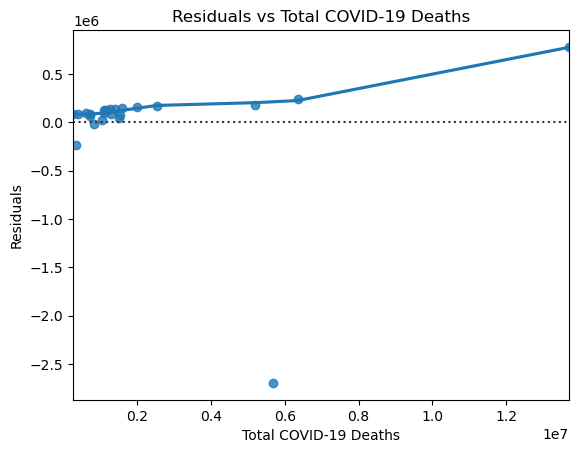

In [8]:
import seaborn as sns

# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Get residuals
residuals = model.resid

# Plot residuals
sns.residplot(x=y, y=residuals, lowess=True)
plt.xlabel('Total COVID-19 Deaths')
plt.ylabel('Residuals')
plt.title('Residuals vs Total COVID-19 Deaths')
plt.show()

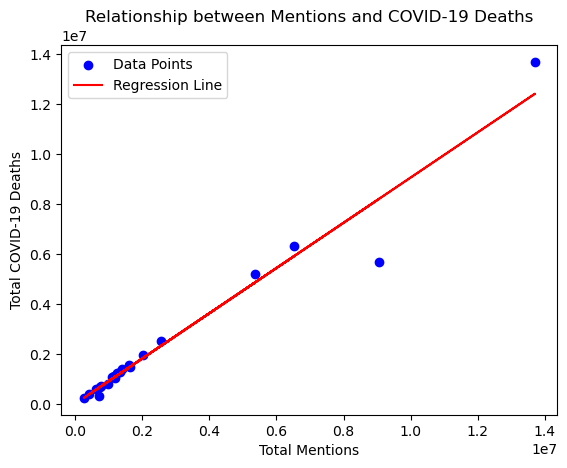

In [9]:
# Scatter plot
plt.scatter(df['total_mentions'], df['total_covid_deaths'], color='blue', label='Data Points')

# Regression line
X_const = sm.add_constant(X)
y_pred = model.predict(X_const)
plt.plot(df['total_mentions'], y_pred, color='red', label='Regression Line')

plt.xlabel('Total Mentions')
plt.ylabel('Total COVID-19 Deaths')
plt.title('Relationship between Mentions and COVID-19 Deaths')
plt.legend()
plt.show()


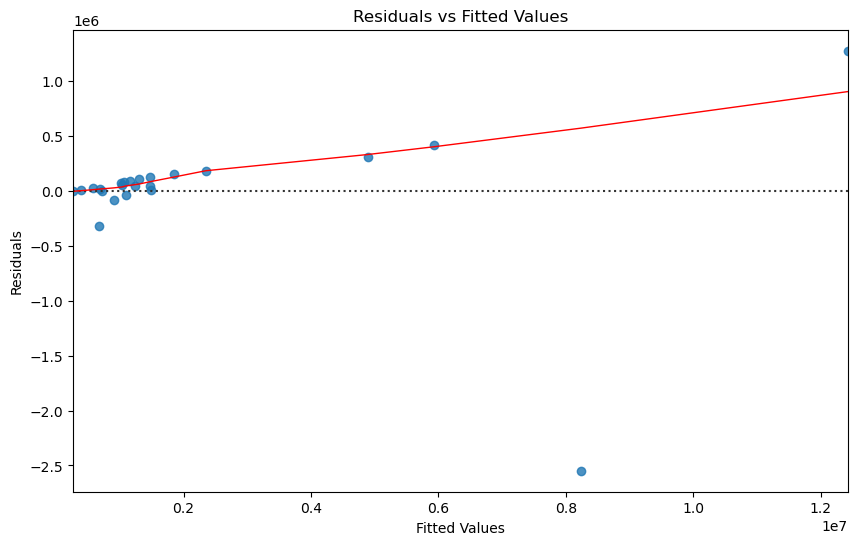

In [8]:
# Get the residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

# Plot Residuals vs Fitted Values
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()